## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

from keras.utils import np_utils
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
from keras.datasets import cifar10
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.5, 0.75, 0.95]
NESTEROV = [True, False]


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
import itertools
from keras import optimizers

for nesterov, momentum in itertools.product(NESTEROV, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with LR = {LEARNING_RATE}, NESTEROV: {nesterov}, MOMENTUM: {momentum}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = optimizers.gradient_descent_v2.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"exp-lr-{LEARNING_RATE}-nesterov-{nesterov}-momentum-{momentum}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.01, NESTEROV: True, MOMENTUM: 0.5
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________________________________________

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 2.0046 - accuracy: 0.2817 - val_loss: 1.9824 - val_accuracy: 0.2740
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8208 - accuracy: 0.3556 - val_loss: 1.7588 - val_accuracy: 0.3745
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7444 - accuracy: 0.3853 - val_loss: 1.7345 - val_accuracy: 0.3923
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6927 - accuracy: 0.4036 - val_loss: 1.7390 - val_accuracy: 0.3839
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6575 - accuracy: 0.4172 - val_loss: 1.6651 - val_accuracy: 0.4075
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6143 - accuracy: 0.4326 - val_loss: 1.7114 - val_accuracy: 0.3993
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5860 - accuracy: 0.4421 - val_loss: 1.6114 - val_accuracy: 0.4260

Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 1.9219 - accuracy: 0.3132 - val_loss: 1.8877 - val_accuracy: 0.3190
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7357 - accuracy: 0.3874 - val_loss: 1.7275 - val_accuracy: 0.3846
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6472 - accuracy: 0.4197 - val_loss: 1.6485 - val_accuracy: 0.4064
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5942 - accuracy: 0.4367 - val_loss: 1.6245 - val_accuracy: 0.4197
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5501 - accuracy: 0.4511 - val_loss: 1.5715 - val_accuracy: 0.4459
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5062 - accuracy: 0.4667 - val_loss: 1.6829 - val_accuracy: 0.4199
Epoch 7/50
196/196 [====

Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 1.8285 - accuracy: 0.3463 - val_loss: 1.6625 - val_accuracy: 0.4042
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6081 - accuracy: 0.4323 - val_loss: 1.5901 - val_accuracy: 0.4298
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5146 - accuracy: 0.4624 - val_loss: 1.4974 - val_accuracy: 0.4677
Epoch 4/50
196/196 [==============================] - 3s 18ms/step - loss: 1.4514 - accuracy: 0.4852 - val_loss: 1.5185 - val_accuracy: 0.4694
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.4048 - accuracy: 0.5014 - val_loss: 1.4652 - val_accuracy: 0.4749
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3631 - accuracy: 0.5145 - val_loss: 1.5669 - val_accuracy: 0.4562


 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 1.9843 - accuracy: 0.2869 - val_loss: 1.9162 - val_accuracy: 0.2905
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8002 - accuracy: 0.3619 - val_loss: 1.7620 - val_accuracy: 0.3704
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7272 - accuracy: 0.3902 - val_loss: 1.7252 - val_accuracy: 0.3777
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6756 - accuracy: 0.4106 - val_loss: 1.6594 - val_accuracy: 0.4186
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6296 - accuracy: 0.4267 - val_loss: 1.6681 - val_accuracy: 0.4079
Epoch 6/50


 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 1.9304 - accuracy: 0.3098 - val_loss: 1.8129 - val_accuracy: 0.3642
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7284 - accuracy: 0.3889 - val_loss: 1.7028 - val_accuracy: 0.3956
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6492 - accuracy: 0.4189 - val_loss: 1.5988 - val_accuracy: 0.4315
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5904 - accuracy: 0.4384 - val_loss: 1.5692 - val_accuracy: 0.4501
Epoch 5/50
196/196 [==

 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8749 - accuracy: 0.3210 - val_loss: 1.7594 - val_accuracy: 0.3636
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6674 - accuracy: 0.4017 - val_loss: 1.6315 - val_accuracy: 0.4221
Epoch 3/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5724 - accuracy: 0.4389 - val_loss: 1.5562 - val_accuracy: 0.4427
Epoch 4/50
196/196 [=============

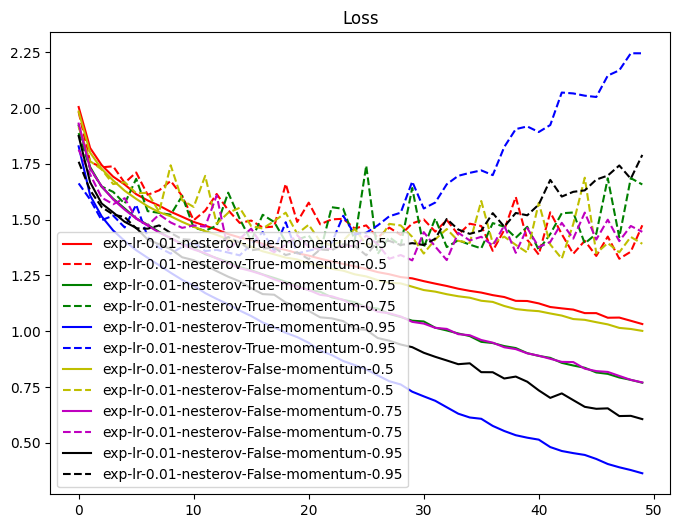

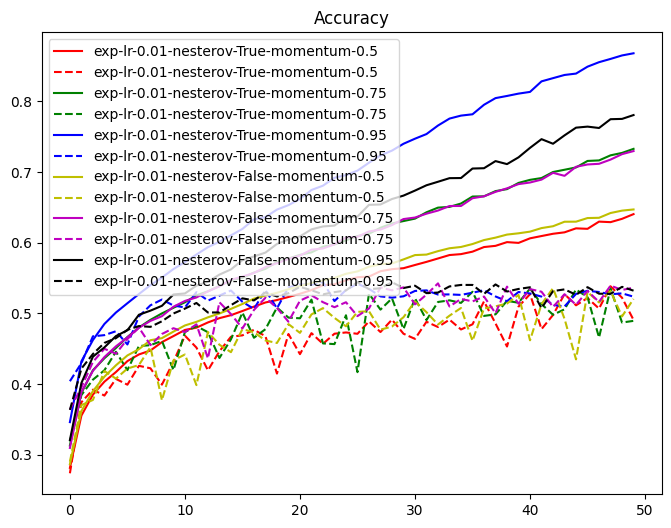

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()